<a href="https://colab.research.google.com/github/jofuture/Hands-On-ML/blob/master/n234a_interpreting_ml_model_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 3 / NOTE 4*

# 📝 Assignment
---

# Interpreting ML Model

### 1) PDP를 만들어 모델을 설명하세요
- 한 특성에 대한 PDP를 만들고 모델을 설명하세요
- 두 특성간 관계에 대한 PDP를 만들고 모델을 설명하세요
- **(제출폼 과제)Boston 데이터의 train 데이터를 사용해 PDP plots을 그린 후, 집값에 대해 상대적으로 양의 선형관계를 나타내는 특성의 번호를 과제 제출폼에 제출하세요.**
    - 1. LSTAT 인구의 낮은 지위 %
    - 2. CRIM 도시별 범죄율 (1인)
    - 3. NOX 산화 질소 농도
    - ***4. RM-주거 당 평균 방 수***

In [1]:
### (제출폼 과제) 이곳에서 과제를 진행해 주세요 ###
!pip install shap
!pip install pdpbox
import sklearn
import xgboost
import shap
from sklearn.model_selection import train_test_split

shap.initjs();

df, target = shap.datasets.boston()
X_train,X_test,y_train,y_test = train_test_split(df, target, test_size=0.2, random_state=2)

model = xgboost.XGBRegressor().fit(X_train, y_train)

### Draw PDP plots ###


     |████████████████████████████████| 358kB 8.9MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491634 sha256=86b830b018f7c8e61ab2ac86504c831ce0c6167e0635d0d5f702a397e272d298
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap
     |████████████████████████████████| 34.0MB 122kB/s 
     |████████████████████████████████| 13.1MB 33.7MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-cp37-none-any.whl size=35758228 sha256=f445f0f6bc67fe64395d662373bdbd1f3fb8a17412706edbaec1d07d99381da7
  Stored in directory: /root/.cache/pip/wheels/c8/13/11/ecac74c6192790c94f6f5d919f1a388f927b9febb690e45eef
Successfully built pdpbox
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


[11:21:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


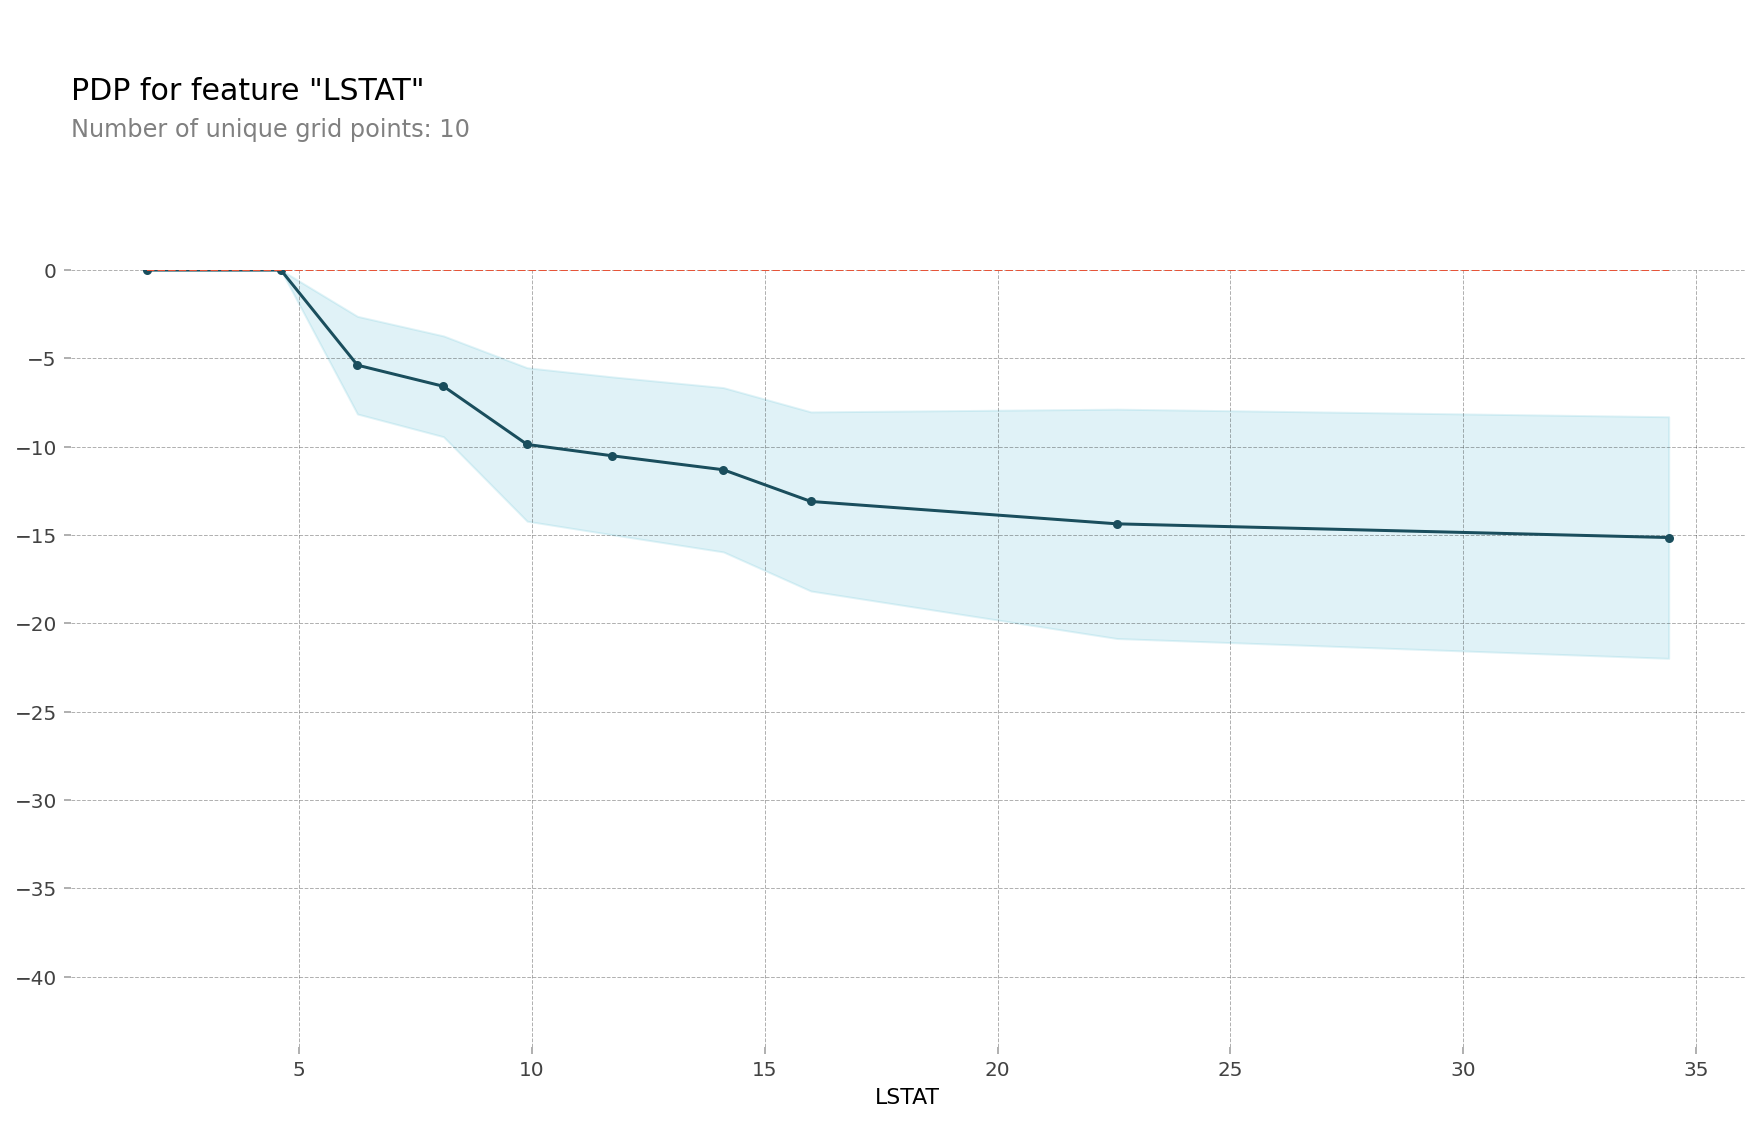

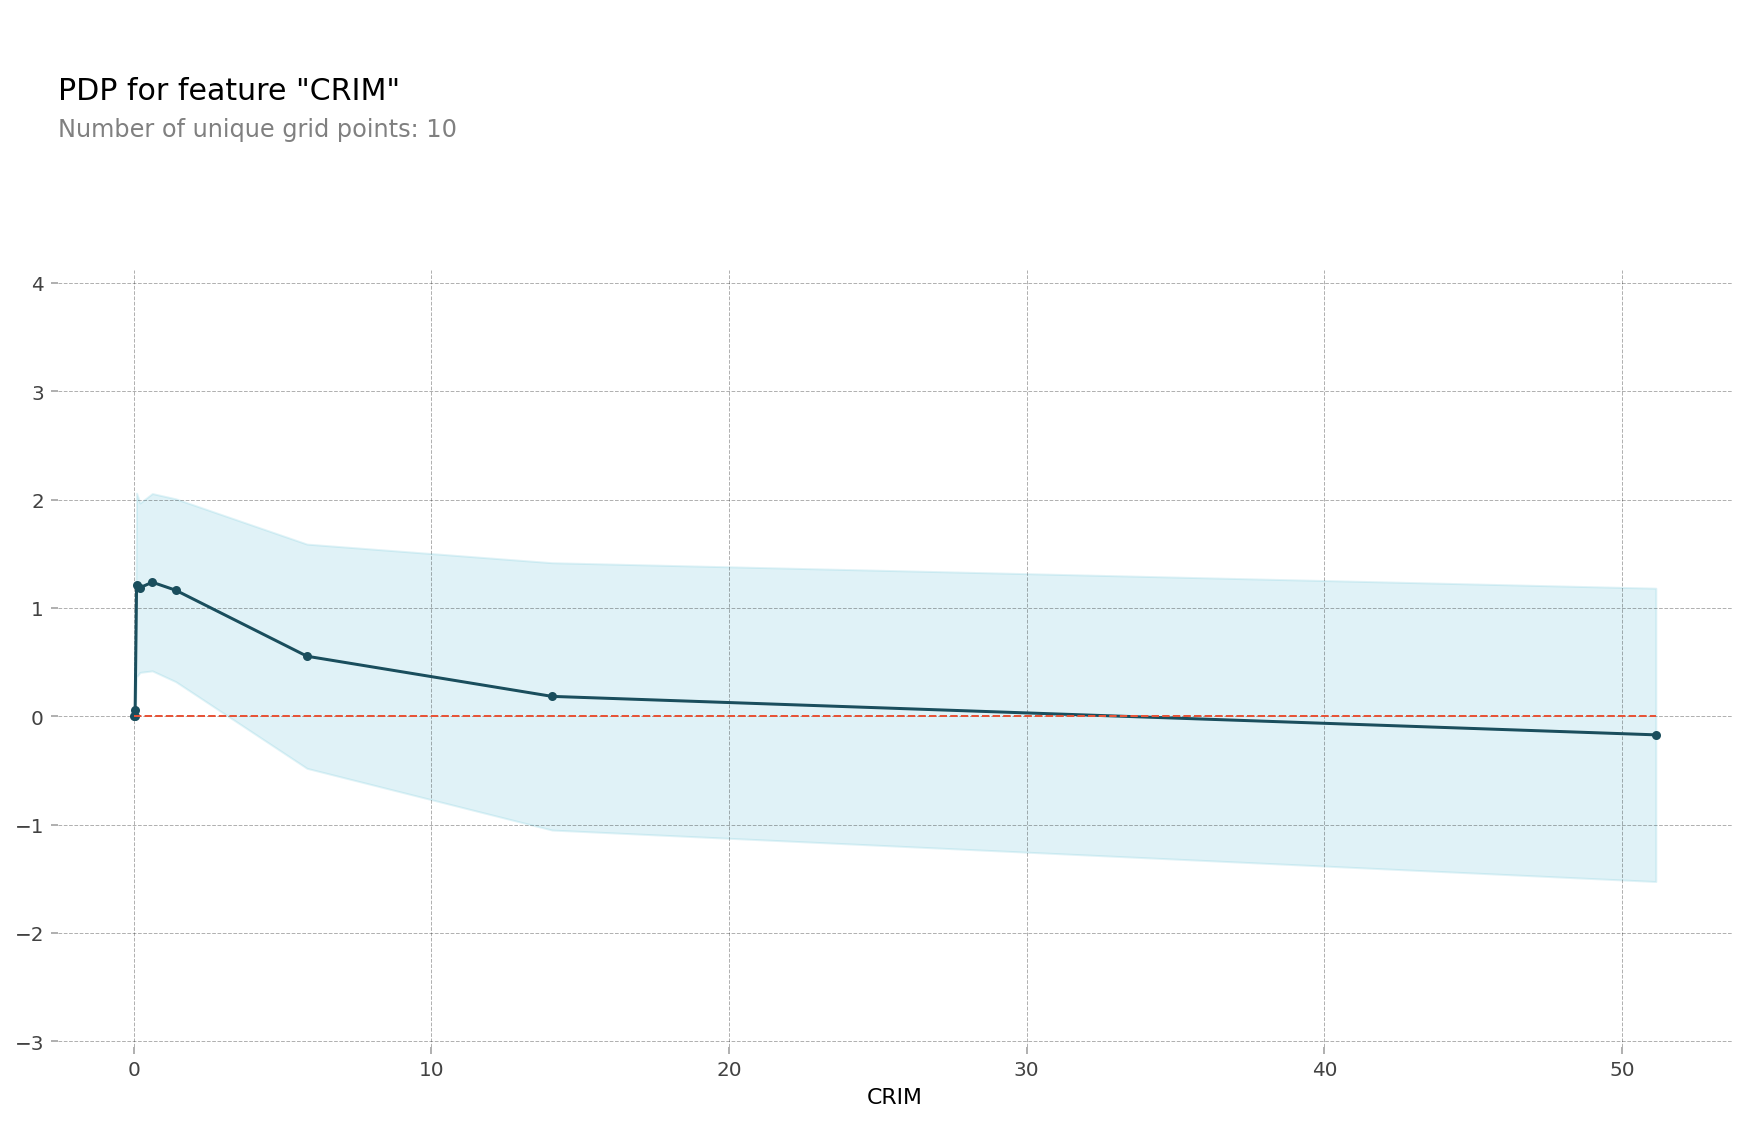

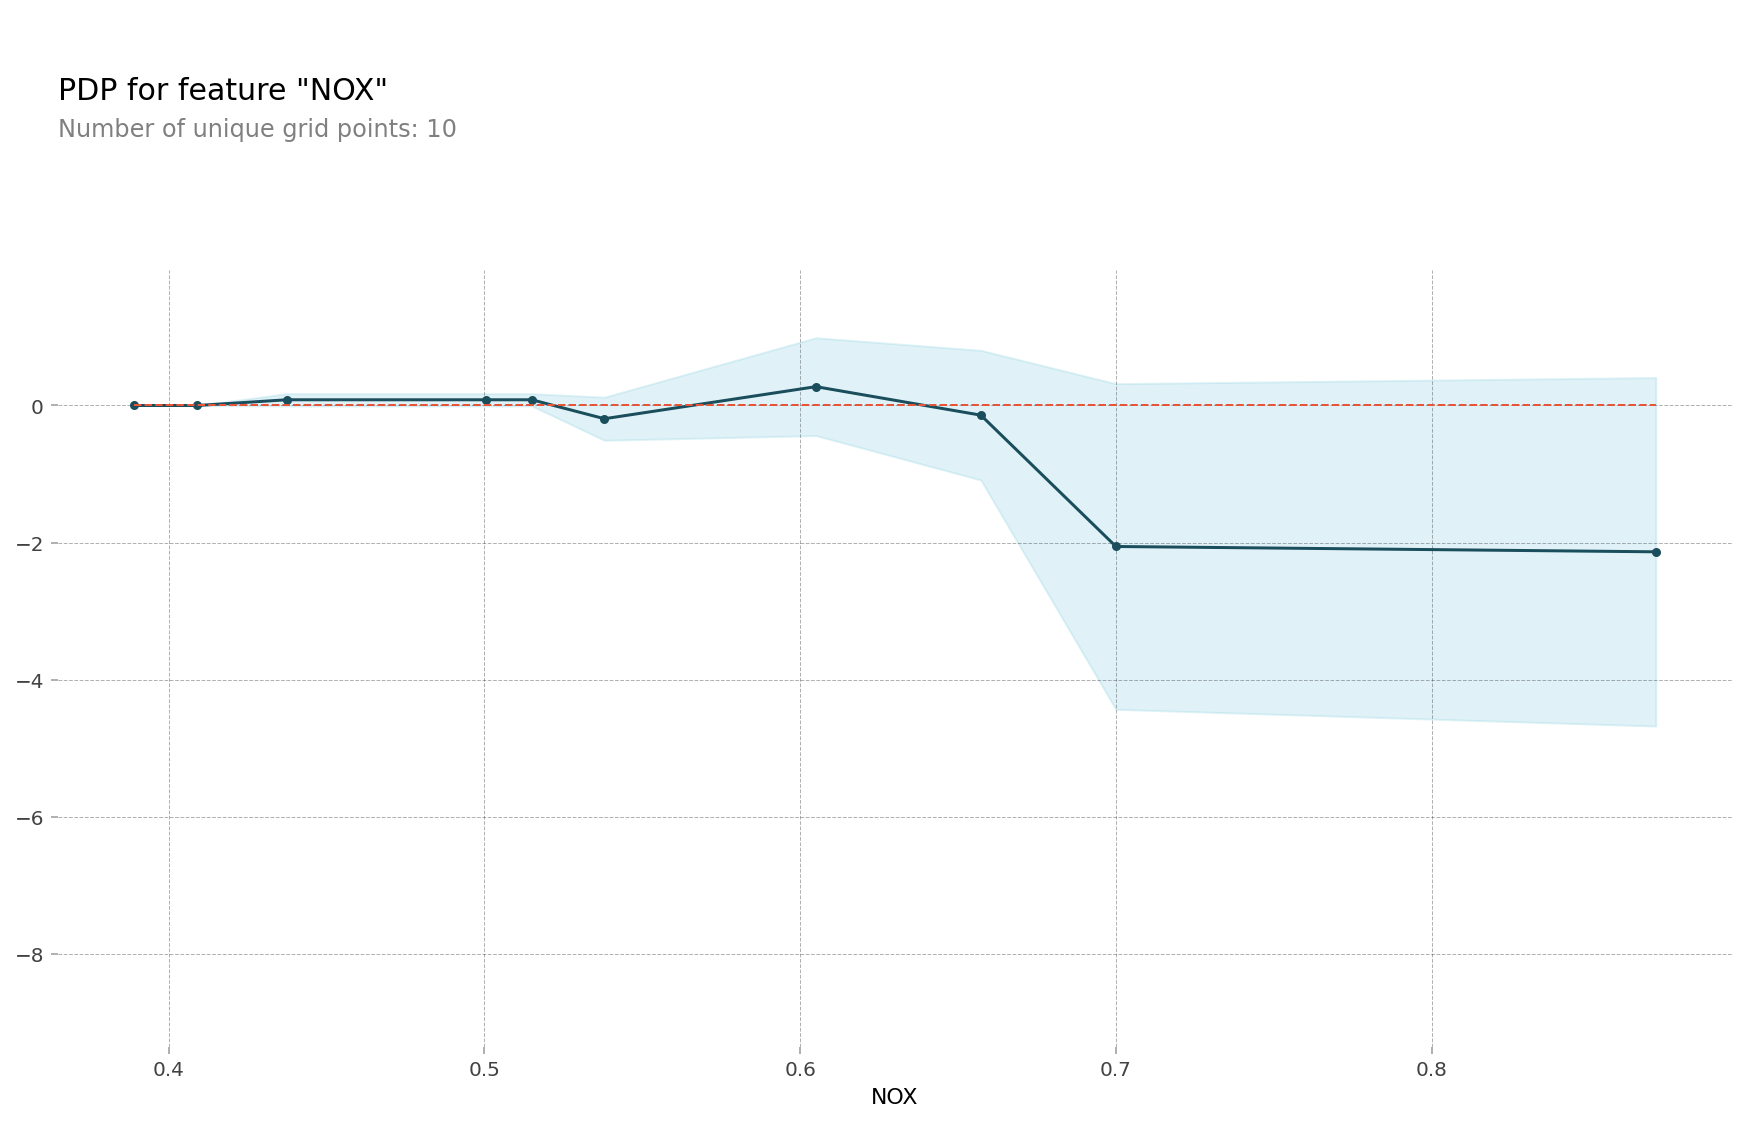

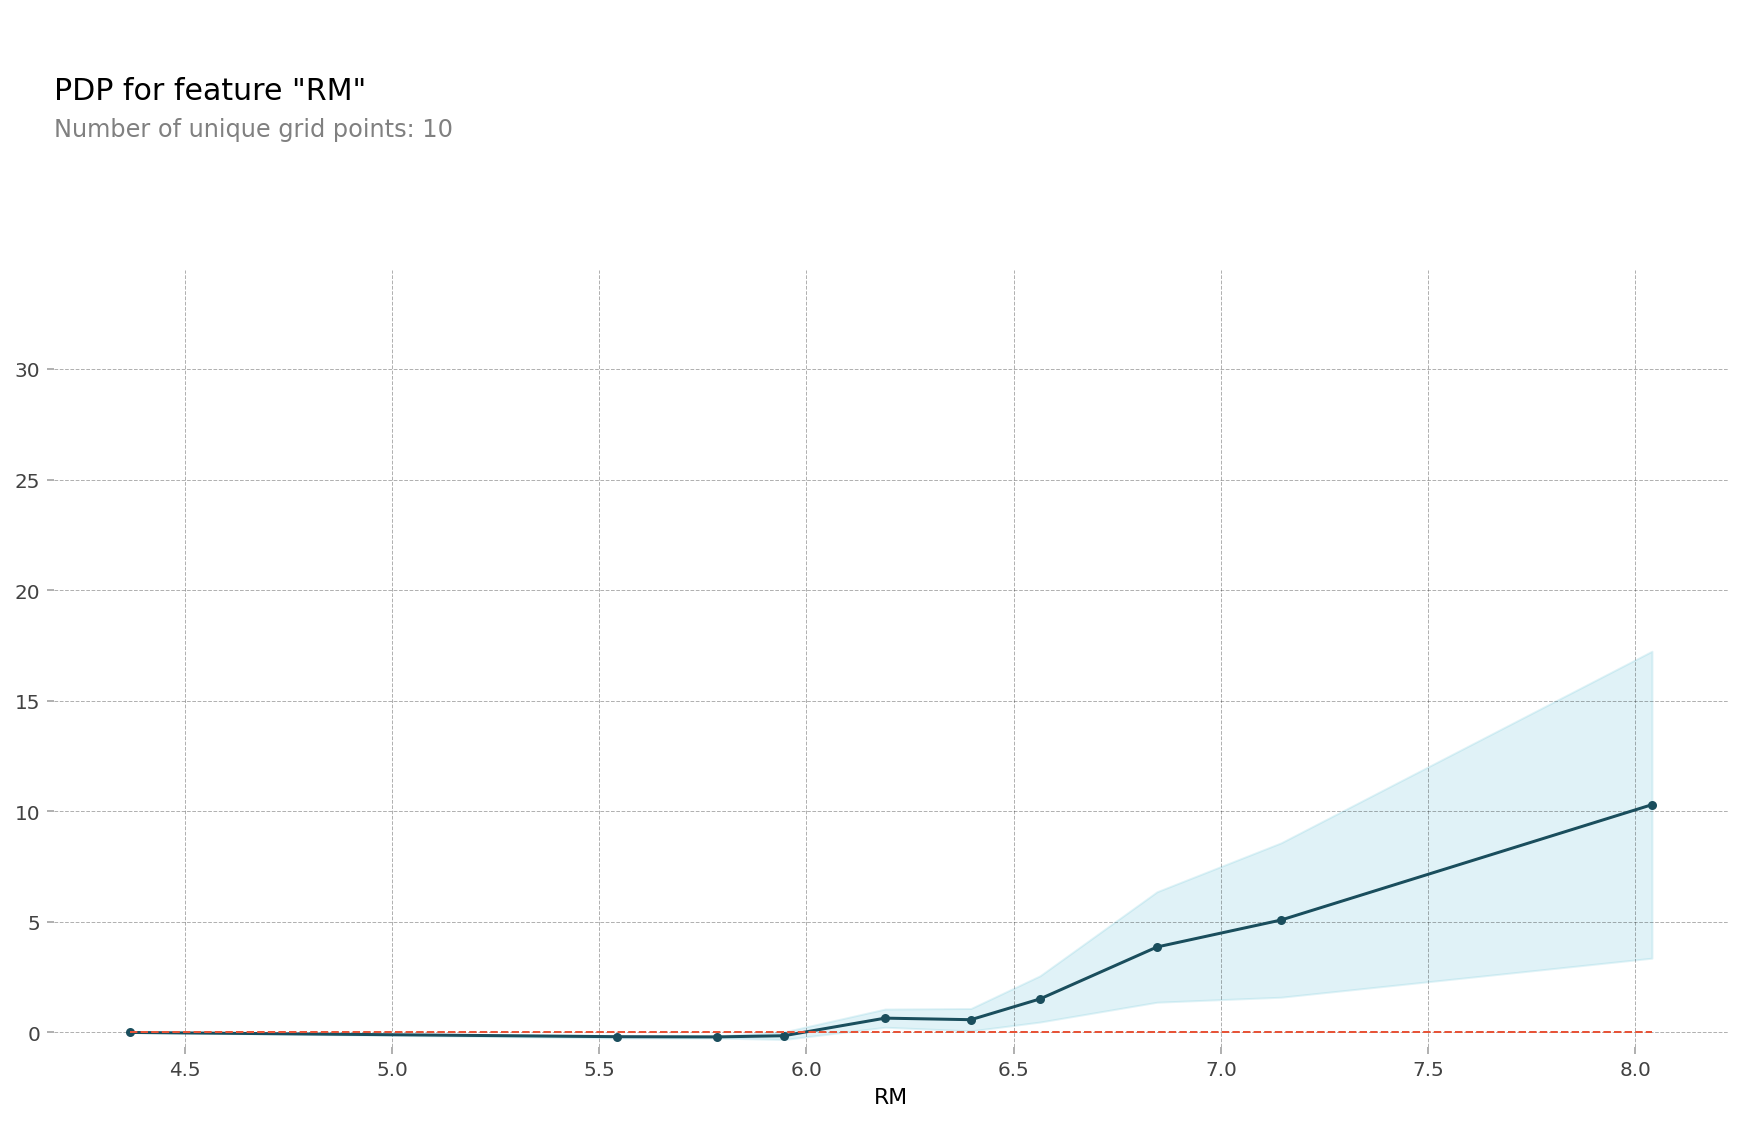

In [2]:

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 144

from pdpbox.pdp import pdp_isolate, pdp_plot
feature_LSTAT = 'LSTAT'
feature_CRIM = 'CRIM'
feature_NOX = 'NOX'
feature_RM = 'RM'


isolated = pdp_isolate(
    model=model, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature_LSTAT,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature_LSTAT);

isolated = pdp_isolate(
    model=model, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature_CRIM,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature_CRIM);

isolated = pdp_isolate(
    model=model, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature_NOX,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature_NOX);

isolated = pdp_isolate(
    model=model, 
    dataset=X_test, 
    model_features=X_test.columns, 
    feature=feature_RM,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=10 # default=10
)
pdp_plot(isolated, feature_name=feature_RM);

### 2) SHAP 라이브러리를 사용해 최소 3개 이상 시각화를 하고 분석하세요
- 본인 포트폴리오 데이터를 사용해서 SHAP 시각화를 수행하세요
- **(제출폼 과제) SHAP 라이브러리를 사용해 다음 문항 중 설명이 올바른 항목을 선택한 후 과제 제출폼에 제출하세요.**
    - 1. force_plot을 그려보면 CRIM은 항상 가격을 낮추는 영향을 준다.
    - 2. SHAP의 summary_plot을 사용하면 permutation importance를 구할 수 있다.
    - 3. SHAP summary_plot을 그려보면 (조건: X_train, plot_type='bar') LSTAT이 가장 영향력이 큰 특성으로 보인다.
    - 4. 모델의 feature importance를 구하면 가장 영향력이 큰 특성이 LSTAT임을 알 수있다.**


In [3]:
### 이곳에서 과제를 진행해 주세요 ###

In [4]:
## UnicodeDecoderError 발생시 xgboost 1.1-> 1.0 다운그레이드 (conda install -c conda-forge xgboost=1.0)

explainer = shap.TreeExplainer(model)
row_processed = processor.transform(row)
shap_values = explainer.shap_values(row_processed)

shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value, 
    shap_values=shap_values, 
    features=row, 
    link='logit' # SHAP value를 확률로 변환해 표시합니다.
)

NameError: ignored

## 🔥 도전과제

### 3) 지속적으로 포트폴리오 프로젝트를 수행하세요
- 지속적으로 데이터를 랭글링 하고 추가적인 시각화 결과를 만드세요

In [ ]:
### 이곳에서 과제를 진행해 주세요 ###